###What this is

A simple basic BERT classification model. For use as baseline.

This notebook has been tested and run on Google Colab. SUTD GPU cluster does not work due to package version issues.

Mount drive and change directory to file if need to.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd drive/MyDrive/hate_speech

In [ ]:
!pip install transformers

In [2]:
import csv
import torch
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torch.utils.data import TensorDataset
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut

Fixed random seed for reproducibility



In [3]:
import random

my_seed = 79
random.seed(my_seed)
np.random.seed(my_seed)
torch.manual_seed(my_seed)
torch.cuda.manual_seed_all(my_seed)

In [4]:
df = pd.read_csv('pheme_indo.csv')
# df.set_index('id', inplace = True)
print(df.label.value_counts())

3    3654
1     972
2     617
0     505
Name: label, dtype: int64


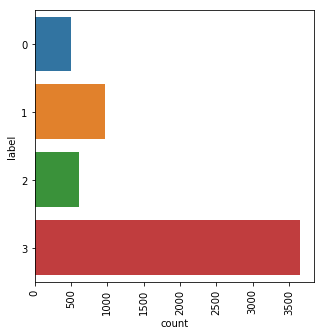

In [5]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="label", data=df)

In [6]:
# unique_labels = df.Label.unique()
# label_dict={}
# for index, unique_label in enumerate(unique_labels):
#   label_dict[unique_label] = index

# df['label_id'] = df.Label.replace(label_dict)
# df.head()

Fixed seed for `train_test_split`

In [7]:
logo = LeaveOneGroupOut()
X = df['full_content']
y = df['label']
groups = df['event']

train_index, test_index = next(logo.split(X, y, groups))
X_train, X_test = X[train_index], X[test_index]
y_train_raw, y_test_raw = y[train_index].values, y[test_index].values
#     print(X_train)
raw_docs_train = X_train.tolist()
raw_docs_test = X_test.tolist()
num_classes = 4

In [8]:
print(raw_docs_train[1])

Laporan yang belum dikonfirmasi mengklaim bahwa Michael Essien telah tertular Ebola. http://t.co/VASQrZdLhH  @FootballcomEN jika belum dikonfirmasi, mengapa Anda men-tweetnya? Hentikan! Semoga Anda mendapatkan Ebola, Anda mengucapkan kata-kata kasar “@FootballcomEN: Laporan yang belum dikonfirmasi mengklaim bahwa Essien telah terjangkit Ebola. http://t.co/8ZFTGNz86a” @FootballcomEN MEU DEUS OLHA ISSO @MikellySuarez “@FootballcomEN: Laporan yang belum dikonfirmasi mengklaim bahwa Michael Essien telah tertular Ebola. http://t.co/hXEgDnArgg” “@FootballcomEN: Laporan yang belum dikonfirmasi mengklaim bahwa Michael Essien telah tertular Ebola. http://t.co/afwQo7evNc” “@FootballcomEN: Laporan yang belum dikonfirmasi mengklaim bahwa Michael Essien telah tertular Ebola. http://t.co/60KVmzU3w2” belum dikonfirmasi..... @FootballcomEN rah “@FootballcomEN: Laporan yang belum dikonfirmasi mengklaim bahwa Michael Essien telah tertular Ebola. http://t.co/LAVYq2As2v”STRESS! “@FootballcomEN: Laporan ya

In [9]:
from utils import preprocess_en_text

print(preprocess_en_text(raw_docs_train[1]))

# processed_docs_train = [preprocess_en_text(i) for i in raw_docs_train]
# processed_docs_test = [preprocess_en_text(i) for i in raw_docs_test]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\edge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\edge\AppData\Local\Programs\Python\Python37\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))
C:\Users\edge\AppData\Local\Programs\Python\Python37\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...
laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola jika belum dikonfirmasi mengapa anda men tweetnya hentikan semoga anda mendapatkan ebola anda mengucapkan kata kata kasar laporan yang belum dikonfirmasi mengklaim bahwa essien telah terjangkit ebola meu deus olha isso laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola belum dikonfirmasi rah laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah terjangkit ebola apa laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah terjangkit ebola laporan yang belum dikonfirmasi mengklaim bahwa michael essien telah tertular ebola f joe bagaimana seseorang memulai desas desus ane

In [11]:
processed_docs_train = [preprocess_en_text(i) for i in raw_docs_train]
processed_docs_test = [preprocess_en_text(i) for i in raw_docs_test]
# import pickle

# with open("processed_docs_train.pickle", 'rb') as handle:
#     processed_docs_train = pickle.load(handle)
    
# with open("processed_docs_test.pickle", 'rb') as handle:
#     processed_docs_test = pickle.load(handle)

In [12]:
import pickle

with open("processed_docs_train_indo.pickle", 'wb') as handle:
    pickle.dump(processed_docs_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open("processed_docs_test_indo.pickle", 'wb') as handle:
    pickle.dump(processed_docs_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
print(processed_docs_train[0])

break news pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi konspirasi rt berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi wtf berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi pasti bohong berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi apaaaa berita terkini pemain internasional ghana dan bintang ac milan michael essien telah terjangkit ebola klubnya telah mengkonfirmasi huhhhh berita terkini pemain internasional ghana dan bin

In [14]:
tokenizer = BertTokenizer.from_pretrained(
    'indolem/indobert-base-uncased',
    do_lower_case = True
)

In [16]:
encoded_data_train = tokenizer.batch_encode_plus(
    processed_docs_train,
    add_special_tokens = True,
    return_attention_mask = True,
    max_length = 512,
    padding = 'max_length',
    truncation = True,
    return_tensors = 'pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    processed_docs_test,
    add_special_tokens = True,
    return_attention_mask = True,
    max_length = 512,
    padding = 'max_length',
    truncation = True,
    return_tensors = 'pt'
)



input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train_raw)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test_raw)

In [17]:
# df.head()
# df.data_type.value_counts()

In [18]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train,labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val,labels_val)

In [19]:
model = BertForSequenceClassification.from_pretrained(
    'indolem/indobert-base-uncased',
    num_labels = 4,
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

In [20]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler

In [21]:
batch_size = 4

# imbalanced dataset, so we need a weighted sampler

class_sample_count_train = np.array([len(np.where(labels_train == t)[0]) for t in np.unique(labels_train)])
weight_train = 1. / class_sample_count_train
samples_weight_train = np.array([weight_train[t] for t in labels_train])
print(samples_weight_train)


samples_weight_train = torch.from_numpy(samples_weight_train).double()
sampler_train = WeightedRandomSampler(samples_weight_train, len(samples_weight_train))


dataloader_train = DataLoader(
    dataset_train,
    sampler = sampler_train,
    batch_size = batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler = RandomSampler(dataset_val),
    batch_size = batch_size
)

[0.00255754 0.00255754 0.00255754 ... 0.00047642 0.00047642 0.00047642]


In [22]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8
)

epochs = 5

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = len(dataloader_train)*epochs
)

In [23]:
from sklearn.metrics import f1_score

In [24]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='macro')

In [25]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v:k for k,v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
      y_preds = preds_flat[labels_flat == label]
      y_true = labels_flat[labels_flat == label]
      print(f'Class:{label_dict_inverse[label]}')
      print(f'Accuracy:{len(y_preds[y_preds == label])}/{len(y_true)}\n')

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [27]:
def evaluate(model, dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [28]:
for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train,
                        desc = 'Epoch {:1d}'.format(epoch),
                        leave = False,
                        disable = False)
    for batch in progress_bar:

      model.zero_grad()

      batch = tuple(b.to(device) for b in batch)

      inputs = {
          'input_ids': batch[0],
          'attention_mask': batch[1],
          'labels': batch[2]
      }
      outputs = model(**inputs)

      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
  

      optimizer.step()
      scheduler.step()

      progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
    torch.save(model.state_dict(),f'BERT_ft_epoch{epoch}.model')

    tqdm.write(f'Epoch {epoch}')
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss:{loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(model, dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss:{val_loss}')
    tqdm.write(f'F1 score (macro):{val_f1}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 1
Training loss:0.9290699599471774
Validation loss:0.9914749568614536
F1 score (macro):0.3747999123920678


Epoch 2:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 2
Training loss:0.47845596634423043
Validation loss:2.057751912902483
F1 score (macro):0.2941535806067431


Epoch 3:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 3
Training loss:0.34465474162464205
Validation loss:1.9683895115949726
F1 score (macro):0.33988735410612325


Epoch 4:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 4
Training loss:0.23690589656854563
Validation loss:1.912576766078525
F1 score (macro):0.35356353203463553


Epoch 5:   0%|          | 0/937 [00:00<?, ?it/s]

Epoch 5
Training loss:0.18708607284450335
Validation loss:1.9483923238161636
F1 score (macro):0.3565349468956487


In [ ]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=len(label_dict),
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

# model.to(device)

# model.load_state_dict(
#     torch.load('BERT_ft_epoch3.model',
#                map_location = torch.device('cpu'))
# )

In [29]:
_,predictions, true_vals = evaluate(model, dataloader_val)
print(predictions, true_vals)
accuracy_per_class(predictions, true_vals)

[[-1.4962974  -2.286536   -3.1187992   6.1362057 ]
 [-2.202026   -3.049602   -1.0884717   6.022205  ]
 [ 6.5032535  -3.5154233  -2.110914   -1.611636  ]
 ...
 [-2.8695834   6.177195   -1.294145   -1.3035967 ]
 [-1.8413253   4.500484   -1.9950536  -0.5568223 ]
 [-3.6563356   4.3052554  -1.456251    0.65759486]] [3 3 3 ... 3 3 0]


NameError: name 'label_dict' is not defined

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [30]:
from sklearn.metrics import precision_recall_fscore_support
preds_flat = np.argmax(predictions, axis=1).flatten()
print(preds_flat)
report = precision_recall_fscore_support(preds_flat, true_vals, average="macro")
print(report)

[3 3 0 ... 1 1 1]
(0.398928412389309, 0.3620520220681356, 0.3565349468956487, None)
